<a href="https://colab.research.google.com/github/5791nbm/FinCoLab/blob/main/markowitz_model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Markowitz Model, optimal portfolio


*   Import Libraries, set parameters
*   Write functions
*   Call functions



In [1]:
#import libraries
import numpy as np, pandas as pd, yfinance as yf, matplotlib.pyplot as plt, scipy.optimize as optimization

#set parameters: on average there are 252 trading days in a year.
num_trading_days = 252
num_portfolios = 10000 #geberate random portfolios
#select stocks
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
#set date range for daily stock returns
start_date = '2012-01-01'
end_date = '2017-01-01'

Write and call functions

                                AAPL        WMT       TSLA          GE  \
Date                                                                     
2012-01-03 00:00:00-05:00  12.388997  15.298921   1.872000   68.163605   
2012-01-04 00:00:00-05:00  12.455575  15.141690   1.847333   68.906143   
2012-01-05 00:00:00-05:00  12.593858  15.068149   1.808000   68.869034   
2012-01-06 00:00:00-05:00  12.725511  14.961651   1.794000   69.240303   
2012-01-09 00:00:00-05:00  12.705328  15.007301   1.816667   70.019943   
...                              ...        ...        ...         ...   
2016-12-23 00:00:00-05:00  26.977627  20.071014  14.222667  140.022781   
2016-12-27 00:00:00-05:00  27.148951  20.117193  14.635333  140.110611   
2016-12-28 00:00:00-05:00  27.033195  20.004625  14.649333  139.232239   
2016-12-29 00:00:00-05:00  27.026249  19.990198  14.312000  139.276123   
2016-12-30 00:00:00-05:00  26.815548  19.949793  14.246000  138.792953   

                                AMZN 

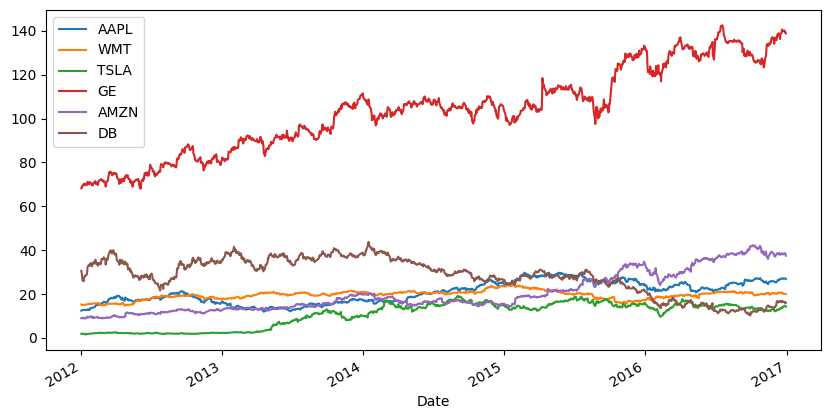

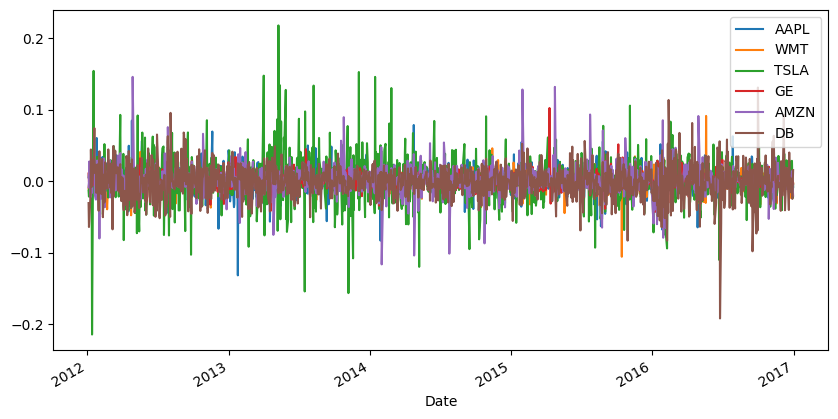

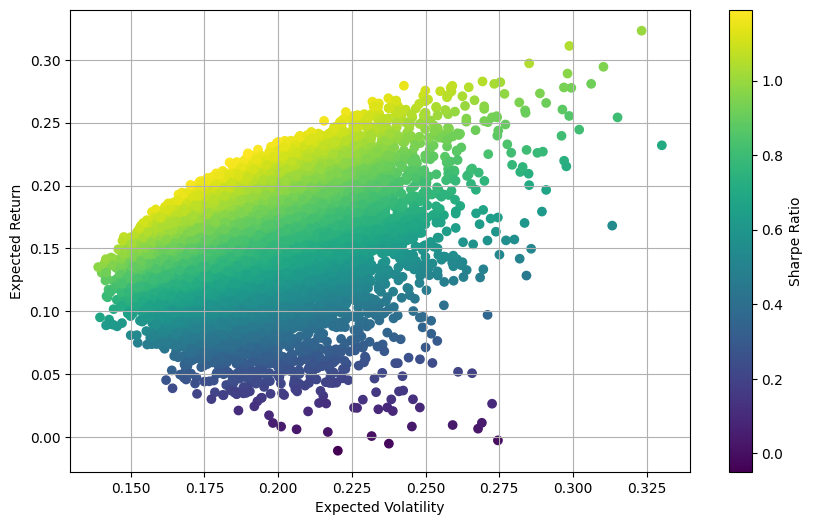

Optimal portfolio:  [0.139 0.    0.166 0.373 0.321 0.   ]
Expected return, volatility and Share ratio:  [0.23440554 0.19510543 1.20143011]


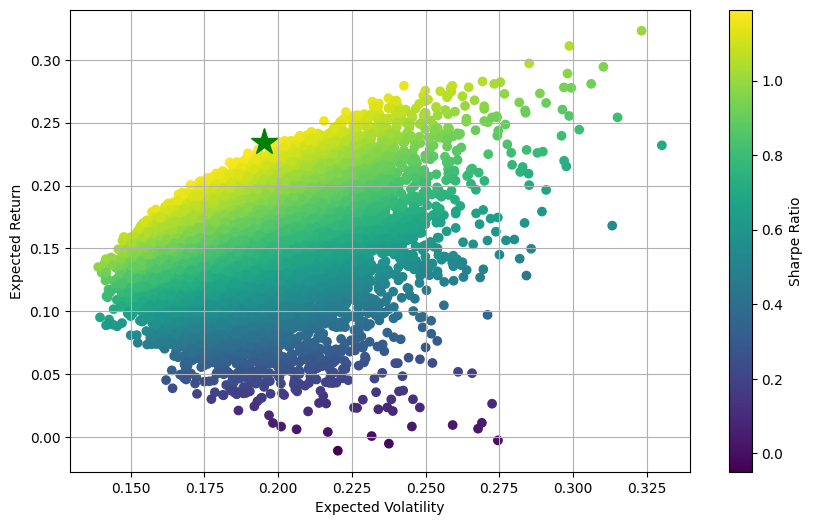

In [8]:
def download_data():
  #create dictionary
  stock_data = {}
  #loop, fill library with downloaded stock data
  for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
  #Convert library to dataframe
  return pd.DataFrame(stock_data)

def show_data(data):
  data.plot(figsize=(10, 5))
  plt.show()

def calculate_return(data):
  log_return = np.log(data/data.shift(1))
  #print(log_return)
  return log_return[1:]

def show_statistics(returns):
  # mean of annual return
  print(returns.mean() * num_trading_days)
  print(returns.cov() * num_trading_days)

def show_mean_variance(returns, weights):
  #we are after the annual return, multiply by trading days
  portfolio_return = np.sum(returns.mean() * weights) * num_trading_days
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * num_trading_days, weights)))
  print('Expected portfolio mean (return): ', portfolio_return)
  print('Expected portfolio volatility (standard dev.): ', portfolio_volatility)

def show_portfolios(returns, volatilities):
  plt.figure(figsize=(10, 6))
  plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.show()

def generate_portfolios(returns):
  portfolio_means = []
  portfolio_risks = []
  portfolio_weights = []

  for _ in range(num_portfolios):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_means.append(np.sum(returns.mean() * w) * num_trading_days)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * num_trading_days, w))))

  return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

def statistics(weights, returns):
  portfolio_return = np.sum(returns.mean() * weights) * num_trading_days
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * num_trading_days, weights)))
  return np.array([portfolio_return, portfolio_volatility, portfolio_return / portfolio_volatility])

#scipypy optimize can find min
#max F(x) is the min of -f(x)
def min_function_sharpe(weights, returns):
  return -statistics(weights, returns)[2]

def optimize_portfolio(weights, returns):
  constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
  bounds = tuple((0,1) for _ in range(len(stocks)))
  # Added return statement to get the optimization result
  return optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns, method='SLSQP', bounds= bounds, constraints= constraints)

def print_optimal_portfolio(optimum, returns):
  print("Optimal portfolio: ", optimum['x'].round(3))
  print('Expected return, volatility and Share ratio: ', statistics(optimum['x'].round(3), returns))

def show_optimal_portfolios(opt, rets, portfolio_rets, portfolio_vols):
  plt.figure(figsize=(10, 6))
  plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets/portfolio_vols, marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.plot(statistics(opt['x'], rets)[1], statistics(optimum['x'], rets)[0], 'g*', markersize=20.)
  plt.show()

if __name__ == '__main__':
  dataset = download_data()
  print(dataset)
  show_data(dataset)
  log_daily_returns = calculate_return(dataset)
  show_data(log_daily_returns)
  # show_statistics(log_daily_returns)

  pweights, means, risks = generate_portfolios(log_daily_returns)
  show_portfolios(means, risks)
  optimum = optimize_portfolio(pweights, log_daily_returns)
  print_optimal_portfolio(optimum, log_daily_returns)
  show_optimal_portfolios(optimum, log_daily_returns, means, risks)

